# Neuroanalysis with Python

Although you may not believe it, you have now learned enough NumPy and Matplotlib to **tackle almost any problem in neuroanalysis!!** But what exactly do I mean with neuroanalysis? In this session and the next, we'll take a look at some of the common kinds of problems and anslysis you will encounter when working with neural data.

First thing first, let's go ahead and import essential packages.

In [59]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Working with neuronal recordings

If you perform electrophysiology recordings on a neuron or perhaps a population of neurons, you will be working with a recording of a **neuron's electrical potential**. This might be made available to you in varioud **data formats**. When you want to work with them, usually the very first question is: **how do I load the data?**

## Loading data files into Python

So far, when you worked with NumPy arrays, most of the data was generated by you, the programmer. With use of functions like `input` we also saw how you could prompt the **user** of your code to enter some data into your code, usually by entering data one at a time.

However, in scientific computing, you would very likely want to work with **data that has been generated elsewhere**. The source of data can be an eletrophysiology system, microscopy imaging system, eye tracker, or even surveys filled out by human subjects. In modern day computing, these data are then typically stored and transported as **files** with some data format. 

Hence, if you want to get data, you will have to somehow load data from files into Python. There are many ways to do this, and we will take a look at few options you have.

### Loading simple textual files

One of the simplest file format is **plain-text** files. As the name suggests, these are files that only contain textual characters inside. For an example, let's take a look at `recordings.dat` file.

Here we are going to use Jupyter's `%load` magic to open up the content of the file.

In [7]:
# %load data/mouse.dat
m122
m104
m48
m690
m329

Let's try to **load the content of the file**. To do so, we are going to use the `open` function in Python to `open` a file!

In [38]:
f = open('data/mouse.dat')

This returns a **file handle** - a special kind of object that **represents a file**.

In [39]:
# read the entire content
content = f.read()

In [40]:
content

'm122\nm104\nm48\nm690\nm329'

In [41]:
print(content)

m122
m104
m48
m690
m329


In [42]:
# run read for the second time
content_again = f.read()

In [43]:
content_again

''

When you are done using a file, you should always **close** the file:

In [44]:
f.close() # closes the file

In [46]:
f.read() # operation on a closed file triggers an error

ValueError: I/O operation on closed file.

#### On a tangent: Escape sequences in a string

Sometimes you would want to express **special key** results such as the `Enter` key resulting in a **line break** and `Tab` key resulting in an indentation. In Python (and in fact almost every other languages), you express these with **escape sequences**.

In [21]:
# a string with line break `\n`
message = 'Hi! This message\nshould appear over\nthree lines!'

In [22]:
message

'Hi! This message\nshould appear over\nthree lines!'

Escape sequences like `\n` will not be treated too specially if you just look into the content of a string. The effect really kicks in when you **print** the string.

In [23]:
print(message)

Hi! This message
should appear over
three lines!


In [29]:
print('This\tshould\tappear\ttab\tshifted\nOccuring\tover\ttwo\tlines')

This	should	appear	tab	shifted
Occuring	over	two	lines


Interesting escape sequence is **a single character** as far as Python is concerned:

In [26]:
var1 = 'abc'
print(var1)
print(len(var1))

abc
3


In [27]:
var2 = 'a\nc'
print(var2)
print(len(var1))

a
c
3


There are [many other escape sequences](https://docs.python.org/3/reference/lexical_analysis.html#string-and-bytes-literals), the newline character `\n` and tab character `\t` are by far the two most common escape sequences you would encounter and thus would want to know!

#### Escaping characters with special meaning

Escape sequence can be useful if you want to use `'` and `"` inside a string literal.

While you could use `'` and `"` inside a string literal as long as you use the other quote kind:

In [35]:
print('This method "works" well')
print("But limits your 'choice'")

This method "works" well
But limits your 'choice'


In [36]:
print('Now I can put "double quotes" and \'single quotes\' in a same string!')

Now I can put "double quotes" and 'single quotes' in a same string!


### Reading file content line by line

Running `read` method on the file handle gives you the entire file content in one string. Although this is a start, this may not be the most convenient way to work with a file.

Thankfully, file handle is an **iterable** object - meaning you can iterate through the file content!

In [48]:
f = open('data/mouse.dat')

for line in f:
    print(line)
    
f.close()

m122

m104

m48

m690

m329


Notice that there is an extra line between each because there is `\n` character at the end of each line that is read.

We can remove any leading and trailing spaces and new line characters -- collectively referred to as **white space characters** -- by using `strip` method on the string

In [49]:
f = open('data/mouse.dat')

for line in f:
    print(line.strip())  # strips leading/trailing whiltespace characters
    
f.close()

m122
m104
m48
m690
m329


We can of course store the line content into a list:

In [51]:
f = open('data/mouse.dat')
mouse_list = []
for line in f:
    mouse_list.append(line.strip())  # strips leading/trailing whiltespace characters
    
f.close()
    
mouse_list

['m122', 'm104', 'm48', 'm690', 'm329']

Actually, it turns out that file object has a method called `readlines` that **almost** does what we want!

In [54]:
f.readlines?

Signature: f.readlines(hint=-1, /)
Docstring:
Return a list of lines from the stream.

hint can be specified to control the number of lines read: no more
lines will be read if the total size (in bytes/characters) of all
lines so far exceeds hint.
Type:      builtin_function_or_method


In [55]:
f = open('data/mouse.dat')
mouse_list = f.readlines()

mouse_list

['m122\n', 'm104\n', 'm48\n', 'm690\n', 'm329']

Only issue is that each data entry has the trailing `\n` on it. Although you can do a full fledged for loop, this is where **list comprehension** can be very handy.

In [56]:
clean_mouse_list = [m.strip() for m in mouse_list]

In [57]:
clean_mouse_list

['m122', 'm104', 'm48', 'm690', 'm329']

## Loading comma separated values

Another common file format you might encounter is a textual file where **distinct values are separated by comma**. These files are typically referred to as **comma-separated values** and have file extension **csv**.

In [76]:
# %load data/position.csv
0.65589,0.57823,0.33661,0.16374,0.12180,-0.08730,-0.32791,-0.02155,-0.56670,-0.70968,-0.83033,-0.94229,-0.62620,-0.83811,-0.84556,-1.00000,-0.99296,-0.99012,-0.87674,-0.86348,-0.92978,-0.93794,-0.74789,-0.54437,-0.69714,-0.57095,-0.47770,-0.05630,-0.05112,0.02798,0.15682,0.56518,0.42280,0.54062,0.73925,0.46023,0.93578,0.83758,0.92696,0.83959,0.98542,0.93230,0.93887,0.98559,0.91488,0.99161,0.66137,0.93301,0.55899,0.32709,0.71629,0.38173,0.28290,0.27180,-0.27958,-0.36215,-0.28922,-0.49119,-0.68146,-0.32334,-0.60336,-0.90789,-0.89853,-0.99541,-0.96631,-0.99483,-0.99976,-0.99998,-0.95507,-0.84919,-0.83438,-0.91877,-0.85928,-0.65672,-0.54651,-0.53178,-0.40231,-0.01891,-0.15738,-0.10022,0.26732,0.25906,0.66773,0.56343,0.61935,0.80379,0.87985,0.75094,0.84290,0.98704,0.97718,0.98602,0.88545,0.99304,0.84986,0.88180,0.74419,0.71700,0.58715,0.54574

In [77]:
f = open('data/position.csv')
data = f.read()
f.close()

data

'0.65589,0.57823,0.33661,0.16374,0.12180,-0.08730,-0.32791,-0.02155,-0.56670,-0.70968,-0.83033,-0.94229,-0.62620,-0.83811,-0.84556,-1.00000,-0.99296,-0.99012,-0.87674,-0.86348,-0.92978,-0.93794,-0.74789,-0.54437,-0.69714,-0.57095,-0.47770,-0.05630,-0.05112,0.02798,0.15682,0.56518,0.42280,0.54062,0.73925,0.46023,0.93578,0.83758,0.92696,0.83959,0.98542,0.93230,0.93887,0.98559,0.91488,0.99161,0.66137,0.93301,0.55899,0.32709,0.71629,0.38173,0.28290,0.27180,-0.27958,-0.36215,-0.28922,-0.49119,-0.68146,-0.32334,-0.60336,-0.90789,-0.89853,-0.99541,-0.96631,-0.99483,-0.99976,-0.99998,-0.95507,-0.84919,-0.83438,-0.91877,-0.85928,-0.65672,-0.54651,-0.53178,-0.40231,-0.01891,-0.15738,-0.10022,0.26732,0.25906,0.66773,0.56343,0.61935,0.80379,0.87985,0.75094,0.84290,0.98704,0.97718,0.98602,0.88545,0.99304,0.84986,0.88180,0.74419,0.71700,0.58715,0.54574'

So problem is that now what you have is a big string of values separated by comma. You would first want to **split them at comma**. Well, that's what the `split` method is for!

In [78]:
split_data = data.split(',')  # split at comma

split_data

['0.65589',
 '0.57823',
 '0.33661',
 '0.16374',
 '0.12180',
 '-0.08730',
 '-0.32791',
 '-0.02155',
 '-0.56670',
 '-0.70968',
 '-0.83033',
 '-0.94229',
 '-0.62620',
 '-0.83811',
 '-0.84556',
 '-1.00000',
 '-0.99296',
 '-0.99012',
 '-0.87674',
 '-0.86348',
 '-0.92978',
 '-0.93794',
 '-0.74789',
 '-0.54437',
 '-0.69714',
 '-0.57095',
 '-0.47770',
 '-0.05630',
 '-0.05112',
 '0.02798',
 '0.15682',
 '0.56518',
 '0.42280',
 '0.54062',
 '0.73925',
 '0.46023',
 '0.93578',
 '0.83758',
 '0.92696',
 '0.83959',
 '0.98542',
 '0.93230',
 '0.93887',
 '0.98559',
 '0.91488',
 '0.99161',
 '0.66137',
 '0.93301',
 '0.55899',
 '0.32709',
 '0.71629',
 '0.38173',
 '0.28290',
 '0.27180',
 '-0.27958',
 '-0.36215',
 '-0.28922',
 '-0.49119',
 '-0.68146',
 '-0.32334',
 '-0.60336',
 '-0.90789',
 '-0.89853',
 '-0.99541',
 '-0.96631',
 '-0.99483',
 '-0.99976',
 '-0.99998',
 '-0.95507',
 '-0.84919',
 '-0.83438',
 '-0.91877',
 '-0.85928',
 '-0.65672',
 '-0.54651',
 '-0.53178',
 '-0.40231',
 '-0.01891',
 '-0.15738',
 '-

Now the data is still in strings, so we want to convert each of these values into `float`. Let's use list comprehension again:

In [79]:
# converts every element of split_data into float
float_data = [float(v) for v in split_data]

In [80]:
float_data

[0.65589,
 0.57823,
 0.33661,
 0.16374,
 0.1218,
 -0.0873,
 -0.32791,
 -0.02155,
 -0.5667,
 -0.70968,
 -0.83033,
 -0.94229,
 -0.6262,
 -0.83811,
 -0.84556,
 -1.0,
 -0.99296,
 -0.99012,
 -0.87674,
 -0.86348,
 -0.92978,
 -0.93794,
 -0.74789,
 -0.54437,
 -0.69714,
 -0.57095,
 -0.4777,
 -0.0563,
 -0.05112,
 0.02798,
 0.15682,
 0.56518,
 0.4228,
 0.54062,
 0.73925,
 0.46023,
 0.93578,
 0.83758,
 0.92696,
 0.83959,
 0.98542,
 0.9323,
 0.93887,
 0.98559,
 0.91488,
 0.99161,
 0.66137,
 0.93301,
 0.55899,
 0.32709,
 0.71629,
 0.38173,
 0.2829,
 0.2718,
 -0.27958,
 -0.36215,
 -0.28922,
 -0.49119,
 -0.68146,
 -0.32334,
 -0.60336,
 -0.90789,
 -0.89853,
 -0.99541,
 -0.96631,
 -0.99483,
 -0.99976,
 -0.99998,
 -0.95507,
 -0.84919,
 -0.83438,
 -0.91877,
 -0.85928,
 -0.65672,
 -0.54651,
 -0.53178,
 -0.40231,
 -0.01891,
 -0.15738,
 -0.10022,
 0.26732,
 0.25906,
 0.66773,
 0.56343,
 0.61935,
 0.80379,
 0.87985,
 0.75094,
 0.8429,
 0.98704,
 0.97718,
 0.98602,
 0.88545,
 0.99304,
 0.84986,
 0.8818,
 0.744

We can quickly plot this data!

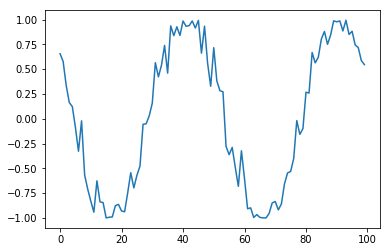

In [81]:
plt.plot(float_data)

Looks like the subject was moving back and forth!

#### On the tangent: plotting data with `plot`

You may have been surprised to see that Matplotlib's `plot` accepts a plain list instead of a NumPy array and that it was okay with just a single list. Somehow, it didn't need x values!

`plot` actually happily accepts any **iterable** data as its x or y value. So you can use `plot` with plain lists!

Also, if you don't supply two lists (for x and y) and just give one list, then the list is automatically considered to be the y-values. `plot` will silently prepare it's own x values that counts up the data points from 0.

## Letting NumPy do the hard work

At this point, you may be surprised how much work is involved in just loading such simple files! Indeed, **figuring out how to load the data could be the hardest part of your project** depending on the project and how data is stored and passed around!

Fortunately, packages like NumPy comes with functions to make loading some files less painful.

### Loading CSV files with NumPy

NumPy comes with `loadtxt` function that can work with a large variety of file formats.

In [86]:
np.loadtxt?

Signature: np.loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding='bytes')
Docstring:
Load data from a text file.

Each row in the text file must have the same number of values.

Parameters
----------
fname : file, str, or pathlib.Path
    File, filename, or generator to read.  If the filename extension is
    ``.gz`` or ``.bz2``, the file is first decompressed. Note that
    generators should return byte strings for Python 3k.
dtype : data-type, optional
    Data-type of the resulting array; default: float.  If this is a
    structured data-type, the resulting array will be 1-dimensional, and
    each row will be interpreted as an element of the array.  In this
    case, the number of columns used must match the number of fields in
    the data-type.
comments : str or sequence of str, optional
    The characters or list of characters used to indicate the start of a
    comment. For backwards com

In [85]:
np.loadtxt('data/position.csv', delimiter=',')

array([ 0.65589,  0.57823,  0.33661,  0.16374,  0.1218 , -0.0873 ,
       -0.32791, -0.02155, -0.5667 , -0.70968, -0.83033, -0.94229,
       -0.6262 , -0.83811, -0.84556, -1.     , -0.99296, -0.99012,
       -0.87674, -0.86348, -0.92978, -0.93794, -0.74789, -0.54437,
       -0.69714, -0.57095, -0.4777 , -0.0563 , -0.05112,  0.02798,
        0.15682,  0.56518,  0.4228 ,  0.54062,  0.73925,  0.46023,
        0.93578,  0.83758,  0.92696,  0.83959,  0.98542,  0.9323 ,
        0.93887,  0.98559,  0.91488,  0.99161,  0.66137,  0.93301,
        0.55899,  0.32709,  0.71629,  0.38173,  0.2829 ,  0.2718 ,
       -0.27958, -0.36215, -0.28922, -0.49119, -0.68146, -0.32334,
       -0.60336, -0.90789, -0.89853, -0.99541, -0.96631, -0.99483,
       -0.99976, -0.99998, -0.95507, -0.84919, -0.83438, -0.91877,
       -0.85928, -0.65672, -0.54651, -0.53178, -0.40231, -0.01891,
       -0.15738, -0.10022,  0.26732,  0.25906,  0.66773,  0.56343,
        0.61935,  0.80379,  0.87985,  0.75094,  0.8429 ,  0.98

It *could* deal with more complex file content.

In [89]:
np.loadtxt('data/block_data.csv', skiprows=1, delimiter=',')

array([[ 0.   ,  3.   ,  0.123,  0.128,  0.105,  0.131],
       [ 1.   ,  9.   ,  0.132,  0.11 ,  0.08 ,  0.03 ],
       [ 4.   , 10.   , -0.53 ,  0.25 ,  0.04 ,  0.83 ],
       [ 3.   , 21.   ,  1.23 ,  1.38 ,  1.29 ,  1.26 ]])

However, NumPy `loadtxt` starts to show limitation when the multiple **data types** are found in a single file.

In [91]:
np.loadtxt('data/named_data.csv', skiprows=1, delimiter=',')

ValueError: could not convert string to float: 'Edgar'

When loading CSV or even excel spread sheet data, you are better off using more **table oriented packages** such as `pandas`. Just a quick demo:

In [92]:
import pandas as pd

In [94]:
df = pd.read_csv('data/named_data.csv')
df

,name,start position,end position,block1,block2,block3,block4
0,Edgar,0,3,0.123,0.128,0.105,0.131
1,John,1,9,0.132,0.110,0.080,0.030
2,Moku,4,10,-0.530,0.250,0.040,0.830
3,Chabo,3,21,1.230,1.380,1.290,1.260


In [95]:
df['name']

0    Edgar
1     John
2     Moku
3    Chabo
Name: name, dtype: object

In [100]:
df[1:3]

,name,start position,end position,block1,block2,block3,block4
1,John,1,9,0.132,0.11,0.08,0.03
2,Moku,4,10,-0.530,0.25,0.04,0.83


## Working with NumPy specific file format

Although you could use formats like **line separated values** and **commad separated values** to store 1-D and 2-D data, saving and loading higher dimensional data can be a challenge. Fortunately, NumPy comes with its own data format that you can use to store and load NumPy arrays conveniently.

### Saving in NumPy file format

Let's create a 4d array filled with random numbers:

In [101]:
data = np.random.randn(10, 5, 3, 4)

We can **save this data into a NumPy data file** using `np.save` function:

In [105]:
np.save?

Signature: np.save(file, arr, allow_pickle=True, fix_imports=True)
Docstring:
Save an array to a binary file in NumPy ``.npy`` format.

Parameters
----------
file : file, str, or pathlib.Path
    File or filename to which the data is saved.  If file is a file-object,
    then the filename is unchanged.  If file is a string or Path, a ``.npy``
    extension will be appended to the file name if it does not already
    have one.
arr : array_like
    Array data to be saved.
allow_pickle : bool, optional
    Allow saving object arrays using Python pickles. Reasons for disallowing
    pickles include security (loading pickled data can execute arbitrary
    code) and portability (pickled objects may not be loadable on different
    Python installations, for example if the stored objects require libraries
    that are not available, and not all pickled data is compatible between
    Python 2 and Python 3).
    Default: True
fix_imports : bool, optional
    Only useful in forcing objects in obj

In [107]:
np.save('data/random4d', data) # by default puts `.npy` extension

And that's it! You have just saved your random array into a file called `data/random4d.npy`!

### Loading in NumPy file format

Of course, saving is just half of the story - we must be able to load it! As you might have guessed, you would use `np.load` function to load data saved in NPY file.

In [108]:
loaded_data = np.load('data/random4d.npy')

In [109]:
loaded_data

array([[[[-0.40675696,  0.6845037 ,  1.67716833, -0.30826373],
         [ 0.61802981, -0.93671278,  0.84340125, -0.34443003],
         [-1.24705474,  0.71071497, -0.01305891, -1.22856607]],

        [[ 0.32415713, -0.23217098,  0.41435101, -1.39383885],
         [-1.23019525,  0.16714739,  0.39653271,  0.37589021],
         [ 0.69719588,  1.00445   , -1.68761832,  0.05611793]],

        [[ 1.12078878,  1.15794286,  0.43048928, -0.05803566],
         [ 0.84806588, -0.74862527, -0.32904372,  2.02714055],
         [ 1.1937354 ,  0.80652503, -0.64441295,  0.64968279]],

        [[ 1.36043026, -1.41219275,  2.62067702,  1.68473534],
         [-0.74760208, -0.94642353, -0.609816  ,  1.18174626],
         [ 0.13293314, -0.12469111,  1.56145934,  1.16690635]],

        [[-1.67583868, -0.30138304,  0.59817088, -0.20548747],
         [-0.16653182, -1.75648453, -1.72248256,  0.86908493],
         [-0.61321754,  1.48116767,  1.00338877, -1.19090496]]],


       [[[-0.78371871,  0.41717884, -1.1142

Let's use `np.all` to verify that our `loaded_data` is the same as the saved `data`.

In [111]:
np.all(data == loaded_data)

True

But notice that these two are **separate copies**: i.e. changing one does **not** change the other.

In [114]:
data[:] = 0 # fill the entire data with 0

In [116]:
loaded_data # loaded copy is unaffected!

array([[[[-0.40675696,  0.6845037 ,  1.67716833, -0.30826373],
         [ 0.61802981, -0.93671278,  0.84340125, -0.34443003],
         [-1.24705474,  0.71071497, -0.01305891, -1.22856607]],

        [[ 0.32415713, -0.23217098,  0.41435101, -1.39383885],
         [-1.23019525,  0.16714739,  0.39653271,  0.37589021],
         [ 0.69719588,  1.00445   , -1.68761832,  0.05611793]],

        [[ 1.12078878,  1.15794286,  0.43048928, -0.05803566],
         [ 0.84806588, -0.74862527, -0.32904372,  2.02714055],
         [ 1.1937354 ,  0.80652503, -0.64441295,  0.64968279]],

        [[ 1.36043026, -1.41219275,  2.62067702,  1.68473534],
         [-0.74760208, -0.94642353, -0.609816  ,  1.18174626],
         [ 0.13293314, -0.12469111,  1.56145934,  1.16690635]],

        [[-1.67583868, -0.30138304,  0.59817088, -0.20548747],
         [-0.16653182, -1.75648453, -1.72248256,  0.86908493],
         [-0.61321754,  1.48116767,  1.00338877, -1.19090496]]],


       [[[-0.78371871,  0.41717884, -1.1142

Now that you have seen various ways of loading files and even learned to save your NumPy array into file, we are ready to work with neural data! But before we move on, let's visit the topic of saving to a file quickly.

### Before moving on: saving to a file

You might have noticed that I haven't really covered how to **save data into a textual file**! This is because:

1. You are far more likely to want to load textual files then to write one out from Python
2. More often than not, there are better tools available for saving your data out to one of many common data formats rather than writing textual files by yourself!

Hence, I'm making a deliberate choice of **not covering how to write your own textual file** here. For interested individuals, I have prepared a separate notebook that covers not only writing textual files, but also on reading and writing binary files.

## Loading neuronal data provided to you

Now you have learned quite a bit about files, let's go ahead and load **a sample** neuronal trace provided to you as a NumPy file.

In [117]:
activity = np.load('data/data_0_2017-05-15.npy')

In [119]:
activity # careful! this will printout a long list!

array([ 3.57887412e-01,  4.47531558e-01,  1.96412988e-01,  3.91114491e-01,
        1.76695176e-01,  3.80088116e-01,  9.36353656e-02,  1.10668001e-02,
        1.14509759e-01,  1.65947705e-01,  1.02058476e-01,  1.15037690e-01,
        2.18115225e-01,  1.34076355e-01,  7.74560696e-02,  9.19639027e-02,
       -7.60109670e-03,  1.12814011e+00,  9.48711628e-01,  7.77781245e-01,
        5.46847747e-01,  3.91930226e-01,  2.19542222e-01,  3.92001858e-01,
        3.17729202e-01,  2.97934834e-01,  1.85589403e-01,  3.04215179e-01,
        8.75626287e-02, -1.76018214e-02,  1.43719730e-01, -1.28348781e-01,
       -4.38344653e-02,  1.57370375e-01,  1.70233992e-01,  8.98556797e-01,
        9.36896773e-01,  1.67418776e+00,  2.48160598e+00,  1.89737445e+00,
        1.45746470e+00,  1.32137967e+00,  1.05349900e+00,  1.88503636e+00,
        1.53324759e+00,  1.34566597e+00,  1.93924029e+00,  1.58839106e+00,
        1.26074176e+00,  1.21973014e+00,  9.80495008e-01,  7.66163859e-01,
        1.59531686e+00,  

In [120]:
activity.shape

(1000,)

You can see that the loaded NumPy array is a rather simple 1D array with 1000 data points.

We will now spend some time analyzing this data!

# Computing statistics on the data

# Processing data for further analysis

## Spike detection

# Fitting models to data

## Linear regression

## Non-linear regression

# Running simulation

## Integrate and fire neurons

## Leaky integrate and fire neurons